# The Sparks Foundation

Graduate Rotational Intership Program-(GRIP)

Author : Prabhat Agnihotri

Task 1 : Prediction Using Supervised Machine Learning

In this task, we have to predict how well a student will score in a test based on the number of hours they have studied. We have two things to consider: the number of hours studied (our input) and the percentage score (our output). We can use a method called simple linear regression to find a relationship between these two variables and make predictions.

# Importing Required Libraries

In [68]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# Data Expedition from Remote URL

In [69]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

# Exploring Data

In [71]:
data.shape

(25, 2)

In [72]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [73]:
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [74]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [76]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

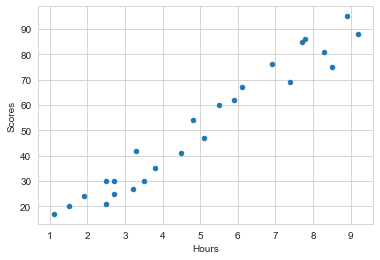

In [77]:
data.plot(kind='scatter', x='Hours', y='Scores')
plt.show()

In [78]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [79]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [80]:
hours = data['Hours']
scores = data['Scores']


<ipython-input-81-a4006d7fac6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hours)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

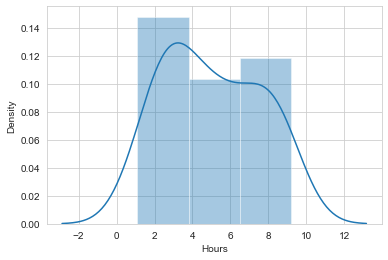

In [81]:
sns.distplot(hours)

<ipython-input-94-cd71314d34aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

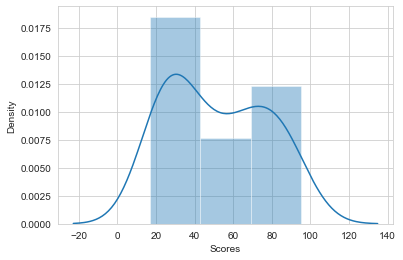

In [94]:
sns.distplot(scores)

# Linear Regression

In [95]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)


In [98]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

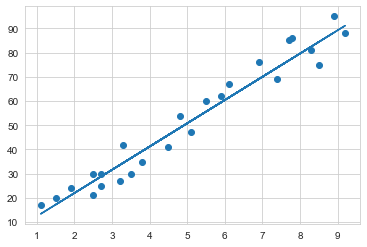

In [99]:
m = reg.coef_
c = reg.intercept_
line = m*X + c
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

In [100]:
y_pred = reg.predict(X_test)

In [101]:
actual_predicted = pd.DataFrame({'Target':Y_test, 'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


<ipython-input-102-0340ae03db43>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


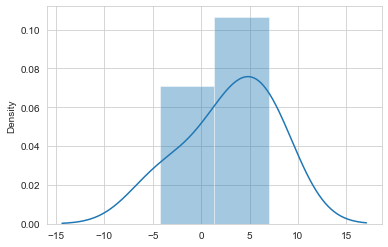

In [102]:
sns.set_style('whitegrid')
residuals = np.array(Y_test - y_pred)
sns.distplot(residuals)
plt.show()

<ipython-input-103-0340ae03db43>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


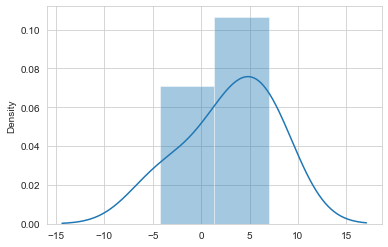

In [103]:

sns.set_style('whitegrid')
residuals = np.array(Y_test - y_pred)
sns.distplot(residuals)
plt.show()


If a student devotes 9.25 hours per day to studying, what score can they expect to achieve?

In [104]:
h = 9.25 
s = reg.predict([[h]]) 

print("If a student devotes {} hours per day to studying, he/she will score {:.2f}% in the exam.".format(h, s[0]))


If a student devotes 9.25 hours per day to studying, he/she will score 91.57% in the exam.


Model Evaluation

In [105]:
from sklearn import metrics
from sklearn.metrics import r2_score

mae = metrics.mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R2 Score:', r2)



Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
